# **Clinic Utilization & Patient Missed Appointments** 

Kaggle dataset: https://www.kaggle.com/datasets/drjfalk/clinic-utilization-patient-missed-appointments

# **Business problem**

A network of clinics specialized in Podiatry (medicine field associated with foot, ankle, and lower extremity) wishes to decrease the rate of missed appointments on its clinic locations. To make strategic decisions, the group needs to know which are the clinics in which this issue is more problematic and why patients are missing the appointments.
The possible outcomes for appointments are:

*   Completed
*   Rescheduled
*   Canceled
*   No-Show (patient did not appear and not contacted the clinic)

# **Imports**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('Clinic_utilization.xlsx')
data.head()

,Encounter ID,Doctor ID,Clinic Location,Department,Patient ID,Appointment Date/Time,Appointment Type,Appointment Length,Reason For Visit,Insurance,Visit Status
0,10001,881452,Marina Del Rey,Podiatry,19334,2022-01-03 08:00:00,New Patient,30,Foot pain,Cash pay,No-Show
1,10002,881452,Marina Del Rey,Podiatry,18913,2022-01-03 08:30:00,Follow-up Visit,15,Plantar fasciitis,Private,Completed
2,10003,881452,Marina Del Rey,Podiatry,13799,2022-01-03 08:45:00,Follow-up Visit,15,Achilles tendon,Private,Completed
3,10004,881452,Marina Del Rey,Podiatry,10926,2022-01-03 09:00:00,Follow-up Visit,15,Big toe pain,Private,Completed
4,10005,881452,Marina Del Rey,Podiatry,14044,2022-01-03 09:15:00,New Patient,30,Heel pain,Private,Completed


> **Data dictionary:**



*   `Encounter ID`: Unique identifier assigned to each clinic visit encounter

*  `Doctor ID`: Unique identifier for each doctor

*  `Clinic Location`: The location (city/neighborhood) of the clinic

*  `Department`: The medical specialty the doctor works within

* `Patient ID`: Unique identifier for each patient

*  `Appointment Date / Time`: The date and time the visit is scheduled for

*  `Appointment Type`: The type of appointment that the patient is scheduled for (e.g. new patient, follow-up visit, procedure)

*  `Appointment Length`: The amount of time (in minutes) that the appointment is scheduled for

*  `Reason for Visit`: The reason the patient is being seen, based on patient's complaint, EHR documentation, or patient chart

*  `Insurance`: Patient's insurance coverage category (e.g. Medicare, private insurance, self/cash-pay)

*  `Visit Status`: Details whether the visit was completed or the patient no-showed, cancelled, or rescheduled



# **Exploratory Data Analysis (EDA)**

> **Finding the time-span for the dataset**

In [ ]:
data['Appointment Date/Time'].max() - data['Appointment Date/Time'].min()

Timedelta('28 days 07:30:00')

> **Renaming the columns**

In [ ]:
renamed_columns = [
    'Visit_id',
    'Doctor_id',
    'Clinic_location',
    'Department',
    'Patient_id',
    'Appointment_datetime',
    'Appointment_type',
    'Appointment_length',
    'Reason',
    'Insurance',
    'Visit_status'
]

data.columns = renamed_columns

In [ ]:
data.head(2)

,Visit_id,Doctor_id,Clinic_location,Department,Patient_id,Appointment_datetime,Appointment_type,Appointment_length,Reason,Insurance,Visit_status
0,10001,881452,Marina Del Rey,Podiatry,19334,2022-01-03 08:00:00,New Patient,30,Foot pain,Cash pay,No-Show
1,10002,881452,Marina Del Rey,Podiatry,18913,2022-01-03 08:30:00,Follow-up Visit,15,Plantar fasciitis,Private,Completed


In [ ]:
data.tail(2)

,Visit_id,Doctor_id,Clinic_location,Department,Patient_id,Appointment_datetime,Appointment_type,Appointment_length,Reason,Insurance,Visit_status
1643,11644,871346,Venice,Podiatry,19320,2022-01-31 15:00:00,Follow-up Visit,15,Plantar warts,Private,No-Show
1644,11645,871346,Venice,Podiatry,19011,2022-01-31 15:30:00,Follow-up Visit,15,Plantar fasciitis,Private,Rescheduled


> **CREATING A BACKUP DATAFRAME**

In [ ]:
data_raw = data.copy()

> **CHECKING FOR NULL VALUES**

In [ ]:
data.isna().sum()

Visit_id                0
Doctor_id               0
Clinic_location         0
Department              0
Patient_id              0
Appointment_datetime    0
Appointment_type        0
Appointment_length      0
Reason                  0
Insurance               0
Visit_status            0
dtype: int64

**Comment** The dataset has no null values.

> **CHECKING FOR DATA TYPES**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Visit_id              1645 non-null   int64         
 1   Doctor_id             1645 non-null   int64         
 2   Clinic_location       1645 non-null   object        
 3   Department            1645 non-null   object        
 4   Patient_id            1645 non-null   int64         
 5   Appointment_datetime  1645 non-null   datetime64[ns]
 6   Appointment_type      1645 non-null   object        
 7   Appointment_length    1645 non-null   int64         
 8   Reason                1645 non-null   object        
 9   Insurance             1645 non-null   object        
 10  Visit_status          1645 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 141.5+ KB


**Comment**:

*   The columns `Visit_id`, `Doctor_id`, and `Patient_id` could aso be expressed as **strings**. However, they will be left as **integers**.
*   The dataset is composed by **1645 observations** and **11 features**.



In [ ]:
print(f'Observations: {data.shape[0]}')
print(f'Features: {data.shape[1]}')

Observations: 1645
Features: 11


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Visit_id              1645 non-null   int64         
 1   Doctor_id             1645 non-null   int64         
 2   Clinic_location       1645 non-null   object        
 3   Department            1645 non-null   object        
 4   Patient_id            1645 non-null   int64         
 5   Appointment_datetime  1645 non-null   datetime64[ns]
 6   Appointment_type      1645 non-null   object        
 7   Appointment_length    1645 non-null   int64         
 8   Reason                1645 non-null   object        
 9   Insurance             1645 non-null   object        
 10  Visit_status          1645 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 141.5+ KB


> **FEATURE ENGINEERING**

In [ ]:
data['Doctor_id'].drop_duplicates()

0       881452
326     745113
634     813668
953     696455
1321    871346
Name: Doctor_id, dtype: int64

> **ATTRIBUTING EACH ID TO A DOCTOR**

In [ ]:
data['Doctor'] = data['Doctor_id']

data['Doctor'] = data['Doctor'].apply(lambda value: 'Doctor 1' if value == 881452 else value)
data['Doctor'] = data['Doctor'].apply(lambda value: 'Doctor 2' if value == 745113 else value)
data['Doctor'] = data['Doctor'].apply(lambda value: 'Doctor 3' if value == 813668 else value)
data['Doctor'] = data['Doctor'].apply(lambda value: 'Doctor 4' if value == 696455 else value)
data['Doctor'] = data['Doctor'].apply(lambda value: 'Doctor 5' if value == 871346 else value)

In [ ]:
data['Doctor'].drop_duplicates()

0       Doctor 1
326     Doctor 2
634     Doctor 3
953     Doctor 4
1321    Doctor 5
Name: Doctor, dtype: object

> **DROPPING THE UNNECESSARY COLUMNS**

In [ ]:
data.drop([
  'Doctor_id',
  'Patient_id',
  'Appointment_datetime'
   ],
  axis = 1, 
  inplace = True
)

> **UNDERSTANDING THE CLINIC NETWORK**

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Visit_id,1645.0,NaN,NaN,NaN,10823.0,475.014912,10001.0,10412.0,10823.0,11234.0,11645.0
Clinic_location,1645,5,Brentwood,368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department,1645,1,Podiatry,1645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Appointment_type,1645,3,Follow-up Visit,1121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Appointment_length,1645.0,NaN,NaN,NaN,22.31307,10.391479,15.0,15.0,15.0,30.0,60.0
Reason,1645,37,Routine foot care,299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Insurance,1645,3,Private,1108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Visit_status,1645,4,Completed,1471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Doctor,1645,5,Doctor 4,368,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> **Clinic visits:** 1645

> **Clinic locations:** 5

> **Appointment type:** 3

> **Appointment length:** 15-60 min

> **Insurance:** 3

> **Doctors** 5 


**Comment:** Each clinic has a single doctor. There is two possibilites: each clinic location has its own doctor or the doctors are interchanges over the clinic locations.











> **FIRST-LOOK QUESTIONS**:

1. Which are the clinical locations of the network?
2. Which are the possible appointment types?
3. What insurance plans do the patients possess?
4. What is the most frequent appointment length?

**1. Which are the clinical locations of the network?**

In [ ]:
clinic_locations = data['Clinic_location'].drop_duplicates().value_counts().sum()
print(f'Number of clinic locations: {clinic_locations}\n')
data['Clinic_location'].drop_duplicates()

Number of clinic locations: 5



0       Marina Del Rey
326        Culver City
634       Santa Monica
953          Brentwood
1321            Venice
Name: Clinic_location, dtype: object

**2. Which are the possible appointment types?**

In [ ]:
data['Appointment_type'].drop_duplicates()

0         New Patient
1     Follow-up Visit
33          Procedure
Name: Appointment_type, dtype: object

In [ ]:
data['Appointment_type'].value_counts()/len(data['Appointment_type'])*100

Follow-up Visit    68.145897
New Patient        28.024316
Procedure           3.829787
Name: Appointment_type, dtype: float64

Visualizing the results

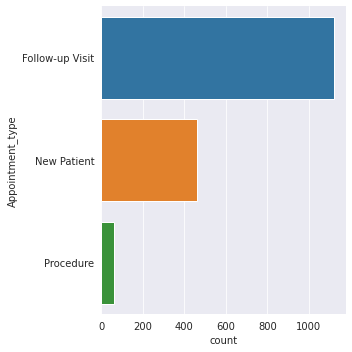

In [ ]:
sns.catplot(kind='count',y='Appointment_type', data=data, 
            order = data['Appointment_type'].value_counts().index)

**3. What insurance plans do the patients possess?**

In [ ]:
data['Insurance'].value_counts()/len(data['Insurance'])*100

Private     67.355623
Medicare    30.638298
Cash pay     2.006079
Name: Insurance, dtype: float64

**4. What is the most frequent appointment length?**

In [ ]:
data['Appointment_length'].value_counts()/len(data['Appointment_length'])*100

15    58.905775
30    37.264438
60     3.829787
Name: Appointment_length, dtype: float64

**Comment** 97.2% of clinical visits fall within 15-30 min lenght. Also, a larger part of appointments length fall within 15 min.

> **BUSINESS QUESTIONS**:

1. What is the percentage of "canceled" and "no-show" appointments of the clinical network?
2. What is the impact of missed appointments on the business for the clinical network?

**1. What is the percentage of "canceled" and "no-show" appointments of the clinical network?**

In [ ]:
failed_appointments = data.query('Visit_status == "Cancelled" | Visit_status == "No-Show"')
all_appointments = len(data['Visit_status'])
missed_appointments = (len(failed_appointments)/all_appointments) * 100
print(f'Missed appointments (%): {missed_appointments}')

Missed appointments (%): 7.841945288753799


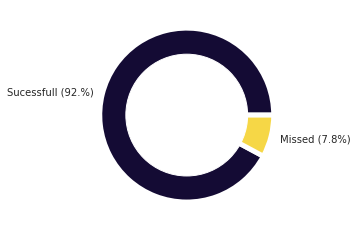

In [ ]:
names = ['Sucessfull (92.%)', 'Missed (7.8%)']
values = [
  (all_appointments-len(failed_appointments)),
  len(failed_appointments)
]

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(values, labels=names, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white'},
        colors = ['#140b34', '#f6d746'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

**2. What is the impact of missed appointments on the business for the clinical network?**

Let's suppose the mean charge of a clinical visit is $60.00. Thus, the financial impact of missed appointments are:

In [ ]:
succesful_appointments = data.query('Visit_status != "Cancelled" | Visit_status != "No-Show"')

**Financial Impact ($)**

Let's consider a hypothetical decreaseing on missed appointments by 2%:

In [ ]:
impact_today = (missed_appointments/100)*all_appointments*(-60)

# supposing we could decrease the % of missed appointments by 2%
better_scenario = ( (missed_appointments-2) / 100)*all_appointments*(-60)
difference = abs(impact_today) - abs(better_scenario)

print(f'Today: ${impact_today}')
print(f'Better scenario: ${better_scenario}')
print(f'Difference: ${difference}')

Today: $-7740.0
Better scenario: $-5765.999999999999
Difference: $1974.000000000001


**Reduction (%)**

In [ ]:
1-better_scenario/impact_today

0.2550387596899226

**Comment:** decreasing the missed appointments by 2% would represent a 25% decrease on Clinical Network costs.

## **Hypothesis testing**

### **Hypothesis 1:** All clinic locations are similar regarding missed appointments

FALSE

In [ ]:
interesting_data = data.query('Visit_status != "Completed" & Visit_status != "Rescheduled"')
canceled = data.query('Visit_status == "Cancelled"')
not_show = data.query('Visit_status == "No-Show"')

In [ ]:
canceled.groupby('Clinic_location')['Visit_status'].value_counts()/len(canceled)*100

Clinic_location  Visit_status
Brentwood        Cancelled       18.604651
Culver City      Cancelled       18.604651
Marina Del Rey   Cancelled       25.581395
Santa Monica     Cancelled        9.302326
Venice           Cancelled       27.906977
Name: Visit_status, dtype: float64

In [ ]:
not_show.groupby('Clinic_location')['Visit_status'].value_counts()/len(not_show)*100

Clinic_location  Visit_status
Brentwood        No-Show         17.441860
Culver City      No-Show         22.093023
Marina Del Rey   No-Show         29.069767
Santa Monica     No-Show         16.279070
Venice           No-Show         15.116279
Name: Visit_status, dtype: float64

In [ ]:
total_missed_by_location = pd.DataFrame({
  'Location': [
      'Brentwood', 
      'Culver City',
      'Marina Del Rey',
      'Santa Monica',
      'Venice'
  ],
    'Missed': [
       18.6+17.4,
       18.6+22.1,
       25.6+29.1,
       9.3+16.3,
       27.9+15.1
  ]
})

In [ ]:
total_missed_by_location = total_missed_by_location.sort_values(by='Missed', ascending=False)

In [ ]:
total_missed_by_location

,Location,Missed
2,Marina Del Rey,54.7
4,Venice,43.0
1,Culver City,40.7
0,Brentwood,36.0
3,Santa Monica,25.6


**Comment:** the problem is happening in all clinic locations. Morevoer, Marina Del Rey is the more problematic clinic location regarding missed appointments, while Santa Monica is the less problematic one.

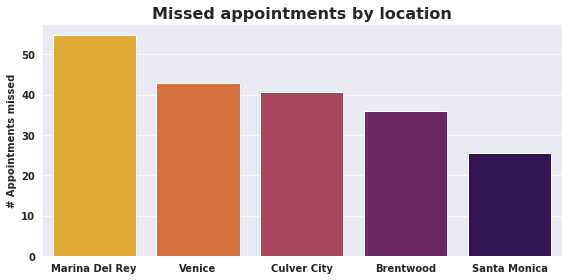

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.barplot(y='Missed', 
              x='Location',
              data=total_missed_by_location,
              palette='inferno_r')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.xlabel('')
plt.ylabel('# Appointments missed', weight='bold')
plt.title('Missed appointments by location',weight='bold',size=16)
plt.tight_layout()
plt.savefig('missed_by_location.png', dpi=600)

**Comment:** Clinics of Marina Del Rey and Culver City are the locations where there are more patients that did not appear. Clinics of Venice and Marine Del Rey have a great amount of canceled appointments. However, some locations could have more appointments scheduled. Thus, it is interesting to standardize the missed appointments to scheduled appointments. 

In [ ]:
total_visits_by_location = data.groupby('Clinic_location')['Visit_id'].sum().sort_values(ascending=False)
total_visits_by_location

Clinic_location
Brentwood         4098600
Venice            3720654
Santa Monica      3443286
Marina Del Rey    3313301
Culver City       3227994
Name: Visit_id, dtype: int64

In [ ]:
std_missed_appointments = pd.DataFrame({
    'Location': ['Brentwood',
                 'Venice',
                 'Santa Monica',
                 'Marina Del Rey',
                 'Culver City'          
    ],
    'Missed_standardized': [
        total_missed_by_location.iloc[0,1] / total_visits_by_location[0]*100,
        total_missed_by_location.iloc[4,1] / total_visits_by_location[1]*100,
        total_missed_by_location.iloc[3,1] / total_visits_by_location[2]*100,
        total_missed_by_location.iloc[2,1] / total_visits_by_location[3]*100,
        total_missed_by_location.iloc[1,1] / total_visits_by_location[4]*100                            
    ]
})

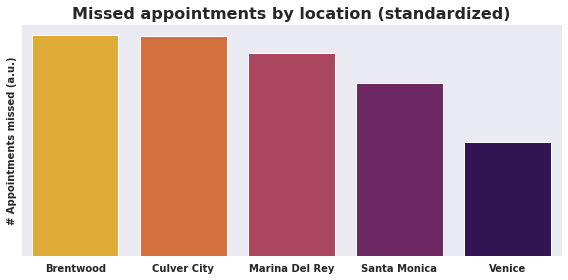

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.barplot(y='Missed_standardized', 
            x='Location',
            data=std_missed_appointments,
            palette='inferno_r',
            order=['Brentwood', 
                   'Culver City',
                   'Marina Del Rey',
                   'Santa Monica',
                   'Venice'])
plt.xticks(weight='bold')
plt.yticks([], weight='bold')
plt.xlabel('')
plt.ylabel('# Appointments missed (a.u.)', weight='bold')
plt.title('Missed appointments by location (standardized)',weight='bold',size=16)
plt.tight_layout()
plt.savefig('missed_by_location_STD.png', dpi=600)

**Comment:** If we look at missed apointments without considering the scheduled appointments, it could result in misinterpretations. As we can see, Venice is the second location with more appointments, however, it is the location with lowest number of missed appointments.

### **Hypothesis 2:** The insurance interferes on missed appointments.

FALSE

In [ ]:
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pywaffle import Waffle

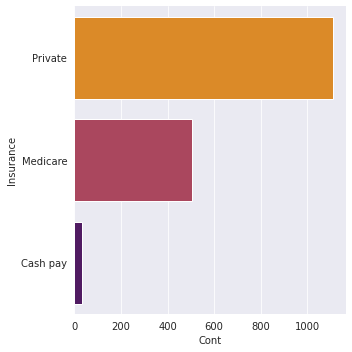

In [ ]:
data.groupby('Insurance')['Visit_status'].value_counts()
sns.catplot(kind='count', y='Insurance', data=data,
            order = ['Private', 'Medicare', 'Cash pay'],
            palette='inferno_r')
plt.xlabel('Cont');
plt.tight_layout()
plt.savefig('Insurances.png', dpi=900)

In [ ]:
canceled.groupby('Insurance')['Visit_status'].value_counts()

Insurance  Visit_status
Cash pay   Cancelled        2
Medicare   Cancelled       23
Private    Cancelled       18
Name: Visit_status, dtype: int64

In [ ]:
canceled_df = pd.DataFrame({
    'Insurance': ['Cash pay', 'Medicare', 'Private'],
    'cancelled': [2, 23, 18]
})

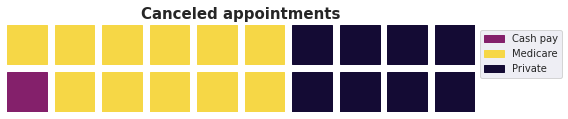

In [ ]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=2,
    columns=10,
    values=canceled_df.cancelled,
    labels=list(canceled_df.Insurance),
    figsize=(8, 5),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1., 1)},
    colors = ['#84206b', '#f6d746','#140b34']
)
plt.title('Canceled appointments', weight='bold', size=15);
plt.tight_layout()
plt.savefig('Canceled_appointments.png', dpi=900)

In [ ]:
not_show.groupby('Insurance')['Visit_status'].value_counts()

Insurance  Visit_status
Cash pay   No-Show         17
Medicare   No-Show         32
Private    No-Show         37
Name: Visit_status, dtype: int64

In [ ]:
not_show_df = pd.DataFrame({
    'Insurance': ['Cash pay', 'Medicare', 'Private'],
    'no_show': [17, 32, 37]
})

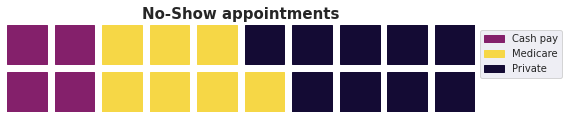

In [ ]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=2,
    columns=10,
    values=not_show_df.no_show,
    labels=list(not_show_df.Insurance),
    figsize=(8, 5),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1., 1)},
    colors = ['#84206b', '#f6d746','#140b34']
)
plt.title('No-Show appointments', weight='bold', size=15);

In [ ]:
total_missed_df = pd.DataFrame({
    'Insurance': ['Cash pay', 'Medicare', 'Private'],
    'Missed': [19, 32+23, 18+37]
})

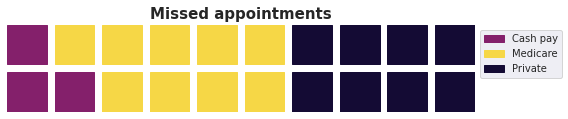

In [ ]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=2,
    columns=10,
    values=total_missed_df.Missed,
    labels=list(not_show_df.Insurance),
    figsize=(8, 5),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1., 1)},
    colors = ['#84206b', '#f6d746','#140b34']
)
plt.title('Missed appointments', weight='bold', size=15);
plt.savefig('m.PNG', dpi=900)

**Comment:** as we can see, the missed appointments seem to be proportional to the amount of patients of the three insurance types.In other words, `canceled` or `no-show`appointments are proportional to the percentage of patients with each insurance.

### **Hypothesis 3:** There is a relationship between the appointment reason and missed appointments.

TRUE

In [ ]:
canceled.groupby('Reason')['Visit_status'].value_counts().sort_values(ascending=False)

Reason             Visit_status
Routine foot care  Cancelled       15
Ingrown toenail    Cancelled        7
Plantar fasciitis  Cancelled        7
Achilles tendon    Cancelled        5
Wound care         Cancelled        5
Calluses           Cancelled        4
Name: Visit_status, dtype: int64

In [ ]:
not_show.groupby('Reason')['Visit_status'].value_counts().sort_values(ascending=False)

Reason             Visit_status
Routine foot care  No-Show         24
Plantar fasciitis  No-Show         11
Ingrown toenail    No-Show         10
Achilles tendon    No-Show          7
Nail care          No-Show          6
Injection          No-Show          5
Wound care         No-Show          5
Ankle sprain       No-Show          4
Rash               No-Show          3
Foot pain          No-Show          2
Wound              No-Show          2
Heel pain          No-Show          1
Flat feet          No-Show          1
Calluses           No-Show          1
Plantar warts      No-Show          1
Big toe pain       No-Show          1
Surgical consult   No-Show          1
Toe pain           No-Show          1
Name: Visit_status, dtype: int64

**Comment:** The reason for appointments seems to interfere on missed appointments. Routine foot care seems to present a higher tendency for missed appointments (including `canceled` or `no-show` ones)

### **Hypothesis 4:** The missed appointments depend on appointment length.

TRUE

In [ ]:
interesting_data.groupby('Appointment_length')['Visit_status'].value_counts()

Appointment_length  Visit_status
15                  No-Show         58
                    Cancelled       27
30                  No-Show         22
                    Cancelled       12
60                  No-Show          6
                    Cancelled        4
Name: Visit_status, dtype: int64

**Comment:** 15 Minute appointments seem to have higher `no-show`cases and considerable `canceled` ones. 30 Minute appointments also have a considerable number of "No-Show". Hence, it is possible that some patients would not like to dislocate considerable distances to have a 15-min clinical visit.

### **Hypothesis 5:** There are doctors who are more problematic regarding missed appointments.

TRUE


In [ ]:
total_visits_doc = data.groupby('Doctor')['Visit_status'].value_counts()
total_visits_doc1 = total_visits_doc[0]+total_visits_doc[1]+total_visits_doc[2]+total_visits_doc[3]
total_visits_doc2 = total_visits_doc[4]+total_visits_doc[5]+total_visits_doc[6]+total_visits_doc[7]
total_visits_doc3 = total_visits_doc[8]+total_visits_doc[9]+total_visits_doc[10]+total_visits_doc[11]
total_visits_doc4 = total_visits_doc[12]+total_visits_doc[13]+total_visits_doc[14]+total_visits_doc[15]
total_visits_doc5 = total_visits_doc[16]+total_visits_doc[17]+total_visits_doc[18]+total_visits_doc[19]

In [ ]:
not_show_doc = not_show.groupby('Doctor')['Visit_status'].value_counts() 

In [ ]:
canceled_doc = canceled.groupby('Doctor')['Visit_status'].value_counts()

In [ ]:
missed_doc_std = pd.DataFrame(
    {'Doctor': ['Doctor 1',
               'Doctor 2',
               'Doctor 3',
               'Doctor 4',
               'Doctor 5'],
    'Missed_std': [
       (not_show_doc[0] + canceled_doc[0])/total_visits_doc1 * 100,
       (not_show_doc[1] + canceled_doc[1])/total_visits_doc2 * 100,
       (not_show_doc[2] + canceled_doc[2])/total_visits_doc3 * 100,
       (not_show_doc[3] + canceled_doc[3])/total_visits_doc4 * 100,
       (not_show_doc[4] + canceled_doc[4])/total_visits_doc5 * 100]
    }
)

missed_doc_std = missed_doc_std.sort_values('Missed_std', ascending=False)
missed_doc_std

,Doctor,Missed_std
0,Doctor 1,11.042945
1,Doctor 2,8.766234
4,Doctor 5,7.716049
3,Doctor 4,6.250000
2,Doctor 3,5.642633


**Comment:** the doctors seem to have a similar rate of missed appointments (standardized to all scheduled appointments each one received). However, *Doctor 1* is more problematic than the others concerning the rate of missed appointments. It is interesting to check it if he could be considered an `outlier` before making any decision that might affect his confidence.

**Checking for descriptive statistics**

In [ ]:
missed_doc_std.describe().T

,count,mean,std,min,25%,50%,75%,max
Missed_std,5.0,7.883572,2.149369,5.642633,6.25,7.716049,8.766234,11.042945


**Comment:** The mean rate of missed appointments is **7.9%** of all scheduled appointments, with a standard deviation of **2.1%**. Thus, some care should be taken with doctors who present a rate of missed appointments higher than **10%**.

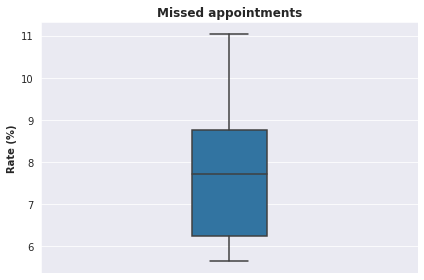

In [ ]:
sns.boxplot(y='Missed_std', data=missed_doc_std, width=0.2)
plt.title('Missed appointments', weight='bold');
plt.ylabel('Rate (%)', weight='bold');
plt.tight_layout()
plt.savefig('boxplot.png', dpi=900)

**Comment:** as could be seen on Boxplot, Doctor 1 is **not** an `outlier`, which means that such a high rate of missed appointments could happen to any other doctor in the network. Furthermore, no additional and drastic decision should be taken (e.g., demission).

### **Hypothesis 6:** The rate of missed appointments is dependent the appointment type.

TRUE


In [ ]:
interesting_data.groupby('Appointment_type')['Visit_status'].value_counts()

Appointment_type  Visit_status
Follow-up Visit   No-Show         63
                  Cancelled       32
New Patient       No-Show         17
                  Cancelled        7
Procedure         No-Show          6
                  Cancelled        4
Name: Visit_status, dtype: int64

In [ ]:
missed_appointment_type = pd.DataFrame(
    {'Appointment type': ['Follow-up Visit',
                          'New Patient',
                          'Procedure'
                         ],
     'Missed appointments': [63+32,
                             17+7,
                             6+4]
    }
)

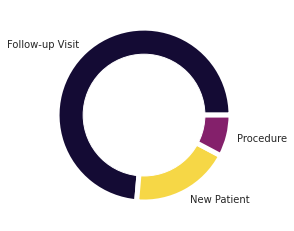

In [ ]:
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(missed_appointment_type['Missed appointments'], 
        labels=missed_appointment_type['Appointment type'],         
        wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white'},
        colors = ['#140b34', '#f6d746', '#84206b'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

**Comment:** Follow-up Visit have a significantly higher missed appointment rate than New Patients. As patients might consider Procedures-related visits more impactful in their lives, they might tend to noT miss the appointment.

# **Conclusions**

By EDA, it was possible to see some key points associated with missed appointments. Hence, by making decisions and conducting experiments on those points, it might be possible to decrease the percentage of missed appointments at the Podiatry Clinical Network.

Some findings/suggestions were:
* Despite the rate of missed appointments being low for the Clinical Network, a minor decrease at this rate could have a great financial impact on the Network.
* The insurance seemed to not interfere with missed appointments.
* The Routine foot care-related appointments could be used to design A/B tests and experiments, as clinic visits associated to Routine foot care are the ones with more missed appointments.
* Visits with a 15-minute length are higher associated with missed appointments, thus some care should be taken in these cases. For example, the clinic network could provide a closer contact or a free-tax drive service to these patients, as there is the possibility of crossing long distances to get a short clinical visit. To track past patients' history concerning missed appointments could be implemented and used as valuable data.
* Doctors did not interfere with missing appointments, thus, this could be exposed to them to maintain their confidence.
* The follow-up visits importance should be exposed to patients through a campaign.